# Radial Basis Function (RBF) Networks

This tutorial will teach you how radial basis function (RBF) networks work, and how to implement them in detail. 

The idea of RBFs is incredibly simple. The predicted value of a data point is simply a function of the distances to a set of pre-defined centers. The goal is to learn a weight for each center such that the overall function optimally fits the data - and it turns out that this can be done by simple linear algebra - inverting a matrix. 

### The Maths

Supposing we have a fixed set $c_1, ..., c_M$ of centers in a $d$-dimensional space. The decision function is simply given by a linear combination of distances from the centers: 

$$ F(x) = \sum_{j} w_j \Phi(||x - c_j||) $$

With an extra twist, though: a kernel function $\Phi$ is applied to each distance, and a linear combination of *these* values is taken. Typically $\Phi$ is a Gaussian function, but it can also be the identity function, so that it really is just a combination of distances. 

Now, our task is to 'learn' the optimal weights $w_i$ for a set of training data $x_1, ... , x_N$ with labels $y_1, ... , y_N$. I put the word learn in inverted commas because the task is quite trivial, and just requires simple matrix algebra. Let's see why - the equation above should hold for instance $(x_i y_i)$ in the training set, mathematically: 

$$ y_i = \sum_{j} w_j \Phi(||x_i - c_j||) $$

This specifies $N$ equations (indexed by $j$), and there are $M$ unknown weights (indexed by $i$). We can quite easily encode this as a matrix equation. Let's define the matrix $\Phi$ (after the kernel function) as 

$$ \Phi_{ij} = \Phi(||x_i - c_j||) $$

I.e. just the matrix of "kernelled" distances from data points to center points. Now our $N$ equations can be written as: 

$$ \Phi \mathbf{w} = \mathbf{y}  $$

where $\mathbf{w} = (w_1, ..., w_M)$ is the vectors of weights and $\mathbf{y} = (y_1, ..., y_N)$ is the vector of labels.  Well, that's not a very hard equation to solve, provided $\Phi$ has a (left) inverse. Thus, our weight vector just: 

$$ \mathbf{w} = \Phi^{-1}  \mathbf{y} $$

And that's how an RBF works. We've solved for our weights (analytically, hence why its not *really* learning) so our job is done.

Time to implement it. 

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np 
import numpy.linalg as LA

## The XOR Problem 

$(0,0) \mapsto 0$                
$(0,1) \mapsto 1$   
$(1,0) \mapsto 1$   
$(1,1) \mapsto 0$ 

The problem is to find a function which correctly classifies these four data points. That seems easy, but remember that a perceptron can't do it because it assumes the classes are linearly separable - try draw a line in the plane separating class 0 from class 1. See plot below of the situation. 

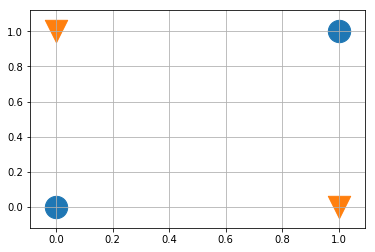

In [208]:
plt.scatter([0,1], [0,1], s = 500)
plt.scatter([1,0], [0,1], s = 500, marker = 'v')
plt.grid()



The prediction function is given by a linear combination of distances from the centroids (after applying function $\Phi$):
$$ F(x) = \sum_{i} w_i \Phi(|| x - c_i||) $$

Lets pick the centroids to be the data points themselves (the four corners), i.e. 

$c_1 = (0,0) $    
$c_2 = (0,1)$    
$c_3 = (1,0)$    
$c_4 = (1,1)$

Lets take the case when $\Phi$ is just the identity function. The possibilities $|| x - c_i ||$ can be written up in a matrix. 

$$
\left(
\begin{array}{cc} 
0  & 1 & 1 & \sqrt{2} \\ 
1  & 0 & \sqrt{2} & 1 \\
1  & \sqrt{2} & 0 & 1 \\
\sqrt{2}  & 1 & 1 & 0 
\end{array}
\right)
\left(
\begin{array}{cc} 
w_1 \\
w_2 \\
w_3 \\
w_4  
\end{array}
\right)    
= 
\left( \begin{array}{cc} 1 \\ 0 \\ 0 \\ 1  \end{array} \right) 
$$ 

Each column in the matrix represents a centroid, and the values are the distances from the centroid. Finding the weights is now simple matrix inversion! Let's calculate the answer in code, and see what we get. 

In [209]:
Phi = np.array([[0, 1, 1, np.sqrt(2)], 
               [1, 0, np.sqrt(2), 1], 
               [1, np.sqrt(2), 0, 1], 
               [np.sqrt(2), 1, 1, 0]])
w = np.dot(LA.inv(Phi), [1,0,0,1])

Now we can implement the prediction function $F$

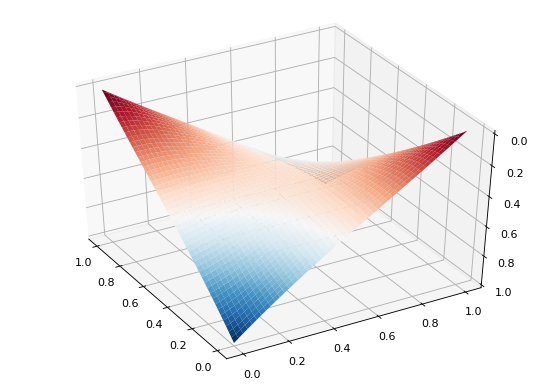

In [210]:

c = np.array([[0.,0.],[0.,1.],[1.,0.],[1.,1.]])
def F(x,y):
    d = [LA.norm([x,y] - ci) for ci in c]
    return np.dot(w, d)

fig = plt.figure(figsize=(8.5, 6), dpi= 80, facecolor='w', edgecolor='k')
# fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.linspace(0, 1, 100)
Y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(X, Y)
Z = np.vectorize(F)(X,Y)
surf = ax.plot_surface(X, Y, Z, cmap='RdBu')
fig.canvas.draw()
ax.view_init(-140, 30)

Boom! This function correctly reproduces the XOR function at the corner values. Lets think of this function as
performing a classification onto the classes {0,1} by checking if the value if less than or greater than 0.5. 

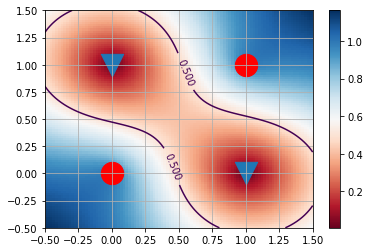

In [211]:
X = np.linspace(-0.5, 1.5, 100)
Y = np.linspace(-0.5, 1.5, 100)
X, Y = np.meshgrid(X, Y)
Z = np.vectorize(F)(X,Y)
plt.pcolor(X,Y,Z, cmap='RdBu')
plt.colorbar()
cntr = plt.contour(X,Y,Z, levels = [0.5])
plt.clabel(cntr, inline=1, fontsize=10)
plt.scatter([0,1], [0,1], s = 500, c = 'r')
plt.scatter([1,0], [0,1], s = 500, marker = 'v')
plt.grid()

## Write an RBF for the sin function

Generate random data following sin curve

In [1]:
from scipy.spatial.distance import cdist

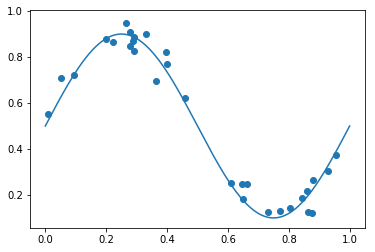

In [10]:
def f(x):
    return 0.5 + 0.4*np.sin(2*np.pi*x)
# sin curve 
x = np.linspace(0,1, 1000)
y = f(x)
# generate data 
n = 30 
X = np.random.rand(n)
Y = f(X) + np.random.normal(size = n, scale =  0.05)
X = np.array([X, Y]).T

plt.plot(x,y)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

Use the data points themselves as centres to achieve *exact interpolation*. We get a 30 x 30 matrix of distances from each point to each other

In [11]:
centres = X[:,0].reshape(-1,1) # centres = data itself
dists = cdist(centres, centres)
dists.shape

(30, 30)

### Approach 1: Use data points themselves as centroids (with Gaussian activation)

** result = overfitting**

This is the basic formula 
$$ F(x) = \sum_{i} w_i \Phi(|| x - c_i||) $$
Or in matrix form, and given training vector $y$, that's just: 
$$ \Phi w = y$$
So, compute $\Phi$ using gaussian kernel, invert it and multiply by $y$!

In [12]:
import scipy.stats as st 

Phi = st.norm.pdf(dists, scale = 0.05)
w_gauss = np.dot(LA.inv(Phi), X[:,1]) 
w_gauss

array([ 9.17437518e+05, -1.61360395e+04, -2.91973270e+07, -4.89701191e+05,
        5.33091071e+04,  2.41029726e+06,  4.16829858e+04, -2.37106172e+04,
       -2.35196313e+06,  1.24513827e+08,  3.12954298e+09,  1.19965640e+05,
       -1.35519713e+12,  8.89726009e+04, -1.08716887e+04, -1.99857265e+07,
        7.03657253e+03,  3.62924749e+06, -1.82615474e+04, -3.73003162e+06,
       -6.46376014e+11, -5.14639486e+04,  1.72839238e+04, -3.70664326e+11,
        3.45946357e+07,  1.87852043e+06,  9.61687919e+11, -1.51513770e+07,
       -1.78631169e+03,  1.40732277e+12])

Woop! The model is trained. Lets apply it to see what we got.  

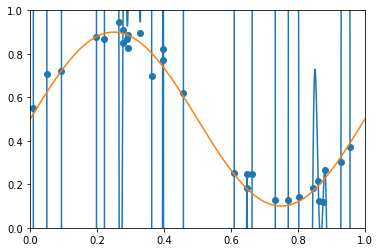

In [13]:
def F(X, centres, w, f_a):
    """applies the RBF function
    X = input 
    w = weight vector 
    f_a = activation function (must work on arrays)
    """
    # compute distances to centroids 
    D = cdist(X, centres)
    # apply activation function 
    Phi = f_a(D)
    # answer is matrix multiplication by weight vector 
    result = np.dot(Phi, w)
    return result

x = np.linspace(0, 1, 1000)
y = f(x)
yp = F(x.reshape(-1,1), centres, w_gauss, lambda x : st.norm.pdf(x, scale = 0.05) )

plt.plot(x,yp)
plt.plot(x,y)
plt.scatter(X[:, 0], X[:, 1])
plt.axis([0,1,0,1])
plt.show()

Mad overfitting! Wild oscillations... This is no good and clearly won't generalize well. 

### Approach 2: Same thing, Linear activation


**result = overfitting**

In [14]:
# train 
Phi = dists
w_lin = np.dot(LA.inv(Phi), X[:,1]) 

# predict 
x = np.linspace(-0.5, 1.5, N).reshape(-1,1)
y = f(x)
yp = F(x, centres, w_lin, lambda x: x)
plt.plot(x,yp)
plt.plot(x,y)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

NameError: name 'N' is not defined

That's a little better - now the trained function draws straight lines between training data. 

### Approach 3: Get fewer centroids using K-means

Now let's do the right thing and train with respect to fewer clusters (so that we don't overfit). 

The approach here is to use K-means clustering (an unsupervised algorithm) to cluster the input data for us - then use these clusters as our centroids. 

#### compute centers using kmeans

In [253]:
from sklearn.cluster import KMeans

# **CHANGE THIS** pick number of cluster 
c = 6
model = KMeans(n_clusters=c)
model.fit(X[:,0].reshape(-1,1))
predictions = model.labels_
centers = model.cluster_centers_
centers

array([[0.9094874 ],
       [0.26613422],
       [0.56400362],
       [0.72772959],
       [0.12623038],
       [0.37383018]])

#### train weights 

In [254]:
# **CHANGE THIS** pick activation function! 
activation = lambda x : st.norm.pdf(x, scale = 0.2)
# activation = lambda x: x

# train 
X[:,0].reshape(-1,1).shape
dists = dst.cdist(X[:,0].reshape(-1,1), centers)
Phi = activation(dists)
w_kmeans = np.dot(LA.pinv(Phi), X[:,1])
w_kmeans

array([ 0.49898898,  1.01214993,  0.78859849, -0.76912817, -0.09383651,
       -0.79803312])

#### predict

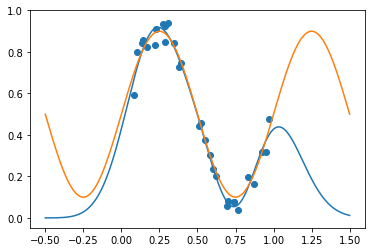

In [255]:
# predict 
x = np.linspace(-0.5, 1.5, N).reshape(-1,1)
y = f(x)
yp = F(x, centers, w_kmeans, activation)
plt.plot(x,yp)
plt.plot(x,y)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

Bloody fantastic!! Well done gang. 